In [12]:
import numpy as np
import pandas as pd
import talib as tb
from pandas_datareader.data import get_data_yahoo
import yfinance
import datetime as dt
import matplotlib.pyplot as plt

yfinance.pdr_override()

In [22]:
company = "TATAMOTORS.NS"
tm_data = get_data_yahoo("TATAMOTORS.NS")

[*********************100%***********************]  1 of 1 completed


In [23]:
tm_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-23,407.000000,410.950012,405.000000,408.399994,408.399994,13113183
2023-01-24,410.000000,424.000000,410.000000,422.149994,422.149994,30197475
2023-01-25,423.750000,427.250000,417.700012,419.049988,419.049988,22975581
2023-01-27,438.000000,453.399994,435.149994,445.600006,445.600006,63360467
2023-01-30,445.600006,450.000000,437.649994,443.649994,443.649994,18312170


In [30]:
data = tm_data.copy()
data['SMA_100'] = tb.SMA(data['Close'],100)

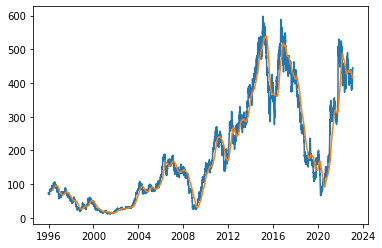

In [31]:
plt.plot(data['Close'])
plt.plot(data['SMA_100'])



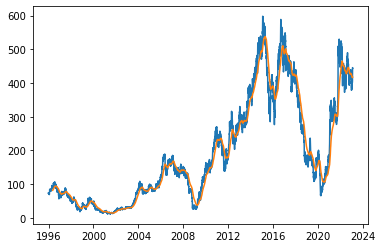

In [34]:
data['EMA_100'] = tb.EMA(data['Close'],100)
plt.plot(data['Close'])
plt.plot(data['EMA_100'])
plt.savefig(f"EMA_100 {company}.jpg")

In [35]:
data['RSI'] = tb.RSI(data['Close'])


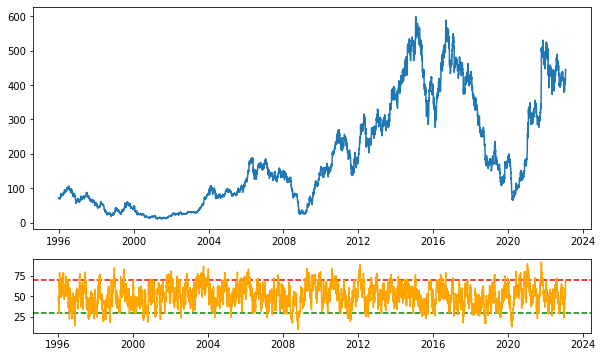

In [40]:
fig,axs = plt.subplots(2,1,gridspec_kw={"height_ratios":[3,1]},figsize=(10,6))
axs[0].plot(data['Close'])
axs[1].axhline(y=70,color="r",linestyle="--")
axs[1].axhline(y=30,color="g",linestyle="--")
axs[1].plot(data['RSI'],color="orange")
plt.savefig(f"RSI {company}.jpg")

